# Introduction

In part 1 of this assessment, you will complete several requested SQL queries in order to extract data, analyze, and provide insights from a single provided SQL database. You will also visualize the key results of 3 of these queries. There are also several 'Reflection' questions that ask you to write out a text based answer in the provided markdown cell. Following the guided question and answer section, in part 2 you will explore a second dataset on your own using SQL in order to conduct a preliminary analysis. You will be asked to produce a very short slide presentation highlighting the work you did for this second section.

## Objectives
You will be able to:
- Interpret "word problems" and translate them into SQL queries
- Decide and perform whichever type of JOIN is best for retrieving desired data
- Use GROUP BY statements to apply aggregate functions like COUNT, MAX, MIN, and SUM
- Use the HAVING clause to compare different aggregates
- Write subqueries to decompose complex queries
- Visualize data using matplotlib, seaborn, or pandas
- Choose the correct chart type based on the given data


## Part 1: Guided SQL Queries

### Your Task: Querying a Customer Database

![toy car picture](images/toycars.jpg)


### Business Understanding
Your employer sells wholesale miniature models of products such as classic cars, motorcycles, and planes. They want you to pull several reports on different segments of their past customers, in order to better understand past sales as well as determine which customers will receive promotional material. They are also interested in investigating which products have performed the best, as well as having several smaller asks.

In addition to providing the requested data from the SQL database you have also been asked to create some basic visuals to display some of the more insightful information. It is up to your discretion to choose the correct plot/chart type for the data in question. **Questions that want you to visualize the results will be explicitly marked**.

### Data Understanding
You may remember this database from a previous lab. As a refresher, here's the ERD diagram for this database:

![ERD picture](images/ERD.png)

The queries you are asked to write will become more complex over the course of the lab.



### Getting Started
For this assessment you are expected to make use of both sqlite3 and the Pandas libraries in order to write, execute, and return SQL queries as a Pandas DataFrame. Assign each returned answer as its own explicit variable.

For the visualization piece you are expected to utilize either Pandas, Seaborn, or Matplotlib to create your visuals. Make sure you are providing verbose labels and titles according to the data you are being asked to visualize. Do not worry too much about choosing a 'style' or 'context' instead focus on conveying the requested information correctly.

### Step 1: Connect to Data

In the cell below
- Import the necessary libraries
- Establish a connection to the database data.sqlite

In [91]:
# Replace None with your code
# Imports
import sqlite3
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandasql import sqldf

# Create connection to database
conn = sqlite3.Connection('data.sqlite')

In [92]:
query = """SELECT *
            FROM customers;"""

df = pd.read_sql(query, conn)
df

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",,Nantes,,44000,France,1370,21000.00
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,,Las Vegas,NV,83030,USA,1166,71800.00
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611,117300.00
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",,Nantes,,44000,France,1370,118200.00
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,,Stavern,,4110,Norway,1504,81700.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,486,Motor Mint Distributors Inc.,Salazar,Rosa,2155559857,11328 Douglas Av.,,Philadelphia,PA,71270,USA,1323,72600.00
118,487,Signal Collectibles Ltd.,Taylor,Sue,4155554312,2793 Furth Circle,,Brisbane,CA,94217,USA,1165,60300.00
119,489,"Double Decker Gift Stores, Ltd",Smith,Thomas,(171) 555-7555,120 Hanover Sq.,,London,,WA1 1DP,UK,1501,43300.00
120,495,Diecast Collectables,Franco,Valarie,6175552555,6251 Ingle Ln.,,Boston,MA,51003,USA,1188,85100.00


### Step 2: Limited Edition California Product
The California sales rep team is interested in running promotional material for a new limited edition model they are releasing based on the famous San Francisco Cable Cars. This product will only be available to customer stores based in California and given its high price value they want to first target promotional material to existing California customers with a high credit limit. Upon communicating with the accounting department, a credit limit of over 25,000 is considered to be high. 

Execute a SQl query that returns which customers the sales rep team wants to market to first.

In [67]:
# Replace None with your code
query1 = """SELECT customerName, contactFirstName, contactLastName, phone, state, creditLimit
            FROM customers
            WHERE state = 'CA' and CAST(creditLimit as INTEGER) > 25000;
            """

california_customer_df = pd.read_sql(query1, conn)
california_customer_df

,customerName,contactFirstName,contactLastName,phone,state,creditLimit
0,Mini Gifts Distributors Ltd.,Susan,Nelson,4155551450,CA,210500.00
1,Mini Wheels Co.,Julie,Murphy,6505555787,CA,64600.00
2,Technics Stores Inc.,Juri,Hashimoto,6505556809,CA,84600.00
3,Toys4GrownUps.com,Julie,Young,6265557265,CA,90700.00
4,Collectable Mini Designs Co.,Valarie,Thompson,7605558146,CA,105000.00
5,Corporate Gift Ideas Co.,Julie,Brown,6505551386,CA,105000.00
6,"Men 'R' US Retailers, Ltd.",Brian,Chandler,2155554369,CA,57700.00
7,The Sharp Gifts Warehouse,Sue,Frick,4085553659,CA,77600.00
8,West Coast Collectables Co.,Steve,Thompson,3105553722,CA,55400.00
9,Signal Collectibles Ltd.,Sue,Taylor,4155554312,CA,60300.00


### Step 3: International Collectable Campaign

The international sales rep team has reached out to you to help them identify partners for a 'Collectable' marketing campaign that highlights the potential collectors value in purchasing these model kits. They want to try and promote a 'collect them all' mentality. The team had a great idea to partner with any of their international customers (non-US) who have "Collect" in their name as a tie in to the larger theme.

Execute a SQL that returns the customers in question.

In [68]:
# Replace None with your code
query2 = """SELECT *
            FROM customers
            WHERE country != 'USA' and UPPER(customerName) like '%COLLECT%';
            """
international_collect_df = pd.read_sql(query2, conn)
international_collect_df

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611,117300.00
1,189,"Clover Collections, Co.",Cassidy,Dean,+353 1862 1555,25 Maiden Lane,Floor No. 4,Dublin,,2,Ireland,1504,69400.00
2,201,"UK Collectables, Ltd.",Devon,Elizabeth,(171) 555-2282,"12, Berkeley Gardens Blvd",,Liverpool,,WX1 6LT,UK,1501,92700.00
3,211,"King Kong Collectables, Co.",Gao,Mike,+852 2251 1555,Bank of China Tower,1 Garden Road,Central Hong Kong,,,Hong Kong,1621,58600.00
4,227,Heintze Collectables,Ibsen,Palle,86 21 3555,Smagsloget 45,,Århus,,8200,Denmark,1401,120800.00
5,260,"Royal Canadian Collectables, Ltd.",Lincoln,Elizabeth,(604) 555-4555,23 Tsawassen Blvd.,,Tsawassen,BC,T2F 8M4,Canada,1323,89600.00
6,293,BG&E Collectables,Harrison,Ed,+41 26 425 50 01,Rte des Arsenaux 41,,Fribourg,,1700,Switzerland,,0.00
7,353,Reims Collectables,Henriot,Paul,26.47.1555,59 rue de l'Abbaye,,Reims,,51100,France,1337,81100.00
8,376,Precious Collectables,Urs,Braun,0452-076555,Hauptstr. 29,,Bern,,3012,Switzerland,1702,0.00
9,382,Salzburg Collectables,Pipps,Georg,6562-9555,Geislweg 14,,Salzburg,,5020,Austria,1401,71700.00


## Reflection Question:

Describe the WHERE clause you used in the above query to a non-technical manager who wants to be ensured that you are properly filtering and only selecting the requested data. How is the operator and conditional expression you are using acting to accomplish this?

## Type your answer in markdown here!

We are getting every customer who has 'Collect' found anywhere in their name AND that the customers residing country is not USA.  Meaning they would be international in our eyes.  Both need to be true in order for the customer to be returned.

### Step 4: USA Credit and Inventory Policy - Visual Required
The USA based product team is planning to adjust its credit policies and inventory allocation strategy based on the average credit limit of its customers. They would like to target this strategy at a state level with several goals in mind. 
1. Optimize inventory distribution:
    - States with higher average credit limits might be able to place larger orders, justifying priority in inventory allocation.
    - This could help ensure that states with more purchasing power always have products in stock.
2. Tailor credit policies:
    - Adjust credit limits for new customers based on the state average.
    - Identify states where they might be too conservative or too liberal with credit limits.
3. Target marketing and sales efforts:
    - Focus promotional campaigns on states with higher credit limits, potentially leading to larger orders.
    - Develop strategies to increase sales in states with lower average credit limits.

Execute a SQl query that returns the information required to address this ask.

In [69]:
# Replace None with your code
query3 = """SELECT state, AVG(CAST(creditLimit AS INTEGER)) as Avg_Limit
            FROM customers
            WHERE UPPER(country) = 'USA'
            GROUP BY state;
            """
usa_state_credit_df = pd.read_sql(query3, conn)
usa_state_credit_df

,state,Avg_Limit
0,CA,83854.545455
1,CT,57350.000000
2,MA,70755.555556
3,NH,114200.000000
4,NJ,43000.000000
5,NV,71800.000000
6,NY,89966.666667
7,PA,84766.666667


Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

Text(0.5, 0, 'State')

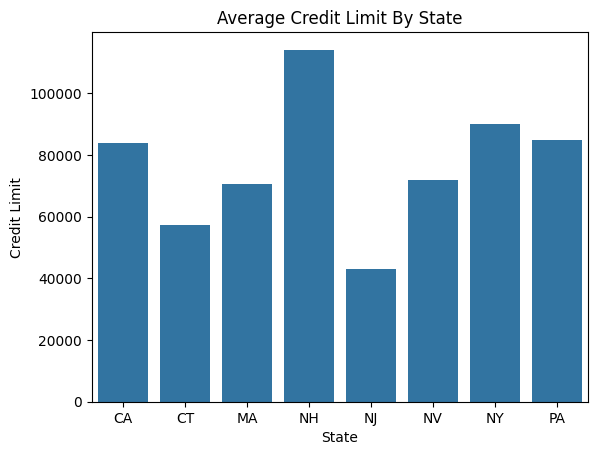

In [70]:
# Replace None with your visual code
# Produce a visual to represent the average credit limit by state
sns.barplot(data=usa_state_credit_df, x='state', y='Avg_Limit')
plt.title( "Average Credit Limit By State")
plt.ylabel('Credit Limit')
plt.xlabel('State')

### Step 5: Top Customers - Visual Required
The company is approaching its 10 year anniversary and wants to acknowledge and thank its top customers with personalized communication. They have asked you to determine the top 10 customers based on the total amount of payments made, making sure to return the customer name for clarity. 

Execute a SQl query that returns the information required to address this ask.


In [71]:
# Replace None with your code
#query5 = """SELECT customerNumber, customerName, SUM(CAST(priceEach AS INTEGER) * CAST(quantityOrdered AS INTEGER)) as TotalSpent
#            FROM customers LEFT JOIN orders USING (customerNumber)
#                            LEFT JOIN orderDetails USING (orderNumber)
#            GROUP BY customerNumber, customerName
#            ORDER BY TotalSpent DESC
#            LIMIT 5;
#            """

query5 = """SELECT customerNumber, customerName, SUM(CAST(amount AS INTEGER)) as TotalPayments
            FROM customers JOIN payments USING (customerNumber)
            GROUP BY customerNumber, customerName
            ORDER BY TotalPayments DESC
            LIMIT 10;
            """


topten_customers_df = pd.read_sql(query5, conn)
topten_customers_df

,customerNumber,customerName,TotalPayments
0,141,Euro+ Shopping Channel,715733
1,124,Mini Gifts Distributors Ltd.,584184
2,114,"Australian Collectors, Co.",180584
3,151,Muscle Machine Inc,177912
4,148,"Dragon Souveniers, Ltd.",156250
5,323,"Down Under Souveniers, Inc",154621
6,187,"AV Stores, Co.",148409
7,276,"Anna's Decorations, Ltd",137032
8,321,Corporate Gift Ideas Co.,132340
9,146,"Saveley & Henriot, Co.",130304


Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

Text(0.5, 1.0, 'Top 10 Customers by Payment Amount')

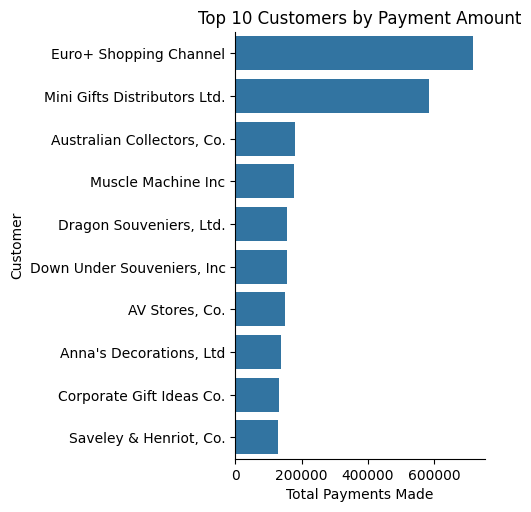

In [72]:
# Replace None with your visual code
# Produce a visual to represent the top ten customers in terms of total payments
sns.catplot(data=topten_customers_df, y='customerName', x='TotalPayments', kind='bar')
plt.xlabel('Total Payments Made')
plt.ylabel('Customer')
plt.title('Top 10 Customers by Payment Amount')

### Step 6: Top Customer + Product Quantities
The product team is running an analysis on popular and common products sold to each customer in order to try and determine what new products they should be looking at to include in their catalog. This data will also be used by individual sales reps to recommend similar products to each customer next time they place an order. 

They have asked you to query information, for each customer, about any product they have purchased 10 or more units of. In addition they would like the full set of data to be sorted in ascending order by the total amount purchased.

Execute a SQl query that returns the information required to address this ask.

Hint: For this one, you'll need to make use of HAVING, GROUP BY, and ORDER BY — make sure you get the order of them correct!

In [73]:
# Replace None with you code
query6 = """SELECT customerName, productName, Sum(CAST(quantityOrdered AS INTEGER)) as TotalOrdered
            FROM customers JOIN orders USING (customerNumber)
                            JOIN orderDetails USING(orderNumber)
                            JOIN products USING(productCode)
            GROUP BY customerName, productName
            HAVING TotalOrdered >= 10
            ORDER BY TotalOrdered;
            """
top_products_df = pd.read_sql(query6, conn)
top_products_df

,customerName,productName,TotalOrdered
0,"Extreme Desk Decorations, Ltd",1961 Chevrolet Impala,10
1,Petit Auto,1913 Ford Model T Speedster,10
2,La Rochelle Gifts,1954 Greyhound Scenicruiser,11
3,Tekni Collectables Inc.,American Airlines: B767-300,11
4,The Sharp Gifts Warehouse,1969 Chevrolet Camaro Z28,13
...,...,...,...
2526,Euro+ Shopping Channel,2002 Chevy Corvette,174
2527,Euro+ Shopping Channel,1957 Chevy Pickup,183
2528,Euro+ Shopping Channel,1970 Dodge Coronet,197
2529,Euro+ Shopping Channel,1958 Chevy Corvette Limited Edition,245


### Step 7: Product Analysis - Visual Required

The product team is looking into the demand across its different product lines. They are conducting a comprehensive review of its product portfolio and inventory management strategies. You have been asked to query data pertaining to each different product line, that contains the total quantity ordered and the total number of products for each respective product line. By examining the number of products and total quantity ordered for each product line, the company aims to:
1. Optimize product mix:
    - Identify which product lines have the most diverse offerings (high number of products)
    - Determine which lines are most popular (high total quantity ordered)
    - Compare if lines with more products necessarily lead to more orders
2. Improve inventory management:
    - Adjust stock levels based on the popularity of each product line
    - Identify potential overstocking in lines with low order quantities
    - Ensure adequate variety in high-performing product lines
3. Adjust marketing strategy:
    - Focus promotional efforts on product lines with high potential (many products but lower order quantities)
    - Capitalize on the popularity of high-performing lines in marketing campaigns
4. Advise Product development:
    - Invest in expanding product ranges for lines with high order quantities
    - Consider phasing out or revamping product lines with low numbers of products and low order quantities

Hint: Think about how you can and might have to utilize SQL DISTINCT statement

Execute a SQl query that returns the information required to address this ask.

In [74]:
# Replace None with your code
query7 = """SELECT productLine, SUM(quantityOrdered) AS Total_Ordered, count (DISTINCT productCode) AS NumProducts
            FROM products JOIN orderDetails USING(productCode)
            GROUP BY productLine;
            """

product_summary_df = pd.read_sql(query7, conn)
product_summary_df

,productLine,Total_Ordered,NumProducts
0,Classic Cars,35582,37
1,Motorcycles,12778,13
2,Planes,11872,12
3,Ships,8532,9
4,Trains,2818,3
5,Trucks and Buses,11001,11
6,Vintage Cars,22933,24


Once you have the information returned in a dataframe, select an appropriate visualization to represent the relationship between total quantity ordered and the number of products in order to perform a preliminary investigation into the question of if more products lead to more orders. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

Text(0.5, 1.0, 'Products Ordered vs Amount of Products in Product Line')

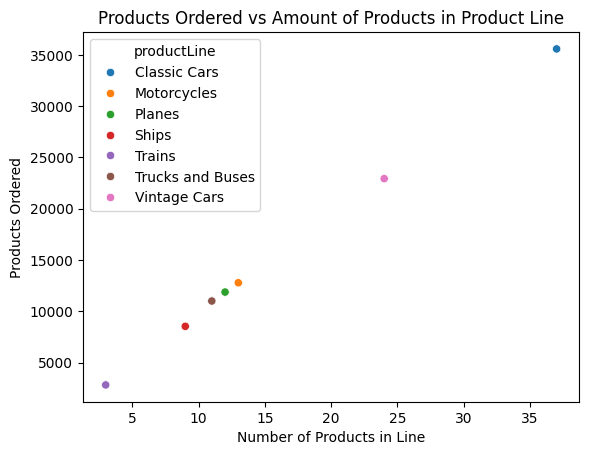

In [75]:
# Replace None with your visual code
# Produce a visual to represent the the relation between number of products and the total amount ordered
sns.scatterplot(data=product_summary_df, x='NumProducts', y='Total_Ordered', hue='productLine')
plt.xlabel('Number of Products in Line')
plt.ylabel('Products Ordered')
plt.title('Products Ordered vs Amount of Products in Product Line')

## Reflection Question:

Please explain your choice in the type of visual you used in order to highlight and represent the data from the above query. In a non-technical manner explain why that chart type makes sense for the information being conveyed. What does this visual convey in the context of the question it was asked for?

## Type your answer in markdown here!

Since we are calculating both the total amount of products sold and the number of different products in a product line.  I chose a scatter plot to display how the increase of one may affect the other.  You can clearly see a trend that when there are more products offered in a product line, the total number of products sold for that line increases.

### Step 8: Remote Offices
Upper management is considering a shift to hybrid and remote work for certain locations and roles. They have tasked you with providing them data about employees who work in any office that has fewer than 5 total employees so they can better understand how to support those employees remotely when offices are shut down. 

Be sure to include information about the employees job and supervisor so management can adjust everyone to remote work properly.

Hint: Utilize a subquery to find the relevant offices

Execute a SQl query that returns the information required to address this ask.

In [76]:
# Replace None with your code
query8 = """SELECT e.employeeNumber, e.firstName, e.lastName, email, e.jobTitle, o.city, e.reportsTo
            FROM employees e JOIN offices o USING (officeCode)
            where e.officeCode in (SELECT officeCode
                                    FROM offices JOIN employees USING (officeCode)
                                    GROUP BY officeCode
                                    HAVING count(employeeNumber) < 5)
            """


remote_locations_df = pd.read_sql(query8, conn)
remote_locations_df

,employeeNumber,firstName,lastName,email,jobTitle,city,reportsTo
0,1088,William,Patterson,wpatterson@classicmodelcars.com,Sales Manager (APAC),Sydney,1056
1,1188,Julie,Firrelli,jfirrelli@classicmodelcars.com,Sales Rep,Boston,1143
2,1216,Steve,Patterson,spatterson@classicmodelcars.com,Sales Rep,Boston,1143
3,1286,Foon Yue,Tseng,ftseng@classicmodelcars.com,Sales Rep,NYC,1143
4,1323,George,Vanauf,gvanauf@classicmodelcars.com,Sales Rep,NYC,1143
5,1501,Larry,Bott,lbott@classicmodelcars.com,Sales Rep,London,1102
6,1504,Barry,Jones,bjones@classicmodelcars.com,Sales Rep,London,1102
7,1611,Andy,Fixter,afixter@classicmodelcars.com,Sales Rep,Sydney,1088
8,1612,Peter,Marsh,pmarsh@classicmodelcars.com,Sales Rep,Sydney,1088
9,1619,Tom,King,tking@classicmodelcars.com,Sales Rep,Sydney,1088


## Reflection Question:

Describe how you decided on the subquery that you used in the query above? This answer can be technically in nature, describing your thought process in how the main query is utilizing the subquery to return the correct data.

## Type your answer in markdown here!

I started out by writing the subquery.  I knew that i needed the list of office codes that had less than 5 employees working.  So in order to do that i would need to group by the office code, where it is HAVING a total count of employee Numbers <5.  I verified first by include the count of employees to make sure they were all less then 5.

Then at that point it was a matter of getting the columns from the employee table that were necessary.  I decided to actually join the table with the offices table (which isn't necessarily needed) so that you can see the actual city the employee works in.  You could have just verified that the employee office code was in the result of the subquery, without joining it to the offices table.

### Step 9: Close the Connection

Now that you are finished executing your queries and retrieving the required information you always want to make sure to close the connection to your database.

In [77]:
# Replace None with your code
conn.close()

### End of Guided Section
In this initial portion of the assessment, you produced several data queries and visualizations for a model company, mainly focused around its customer and product data. You wrote and engineered specific SQL queries to address pertinent questions and asks from the company. Along the way, you utilized many of the major concepts and keywords associated with SQL SELECT queries: FROM, WHERE, GROUP BY, HAVING, ORDER BY, JOIN, SUM, COUNT, and AVG.

## Part 2: Exploratory Analysis with SQL
In this open-ended exploratory section, you will analyze real-world data from the movie industry. As a data analyst, you have the freedom to investigate questions and topics that intrigue you within this dataset. The database schema and Entity-Relationship Diagram (ERD) are provided below for your reference. A general overview and instructions are also provided below.

In [175]:
# Run this cell without changes
import zipfile

zip_file_path = 'im.db.zip'
extract_to_path = './'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

# Connection
conn4 = sqlite3.connect('im.db')

# Schema
schema_df = pd.read_sql("""
SElECT * FROM sqlite_master                        
""", conn4)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


## The Data

![movie ERD](images/movie_data_erd.jpeg)
### Database Content:

- Source: IMDB
- Time Range: Movies released between 2010 and 2019
- Note: Exclude any movies with a start_year after 2019 as this data is not current or accurate

Available Data Categories:
- Genre
- Runtime
- Personnel (writers, directors, actors)
- Movie ratings

### Objectives:

Initial Exploration:
- Use SQL in combination with Pandas to explore the database
- Identify interesting trends, patterns, or relationships in the data

Business Question Formulation:
- Develop at least one substantial business question for deeper analysis
- Ensure the question is relevant, specific, and can be addressed with the available data

Data Cleaning Assessment:
- Identify potential data cleaning tasks necessary for your deeper analysis
- Note: You are not required to perform the cleaning, only to recognize and list the necessary tasks

Null Value Handling:
- Be aware that the dataset contains null values in certain fields
- Exclude these null values from your exploration
- Do not attempt to input or fill in missing information

### Deliverables:

You need to produce a short slide presentation (3-5 slides) that highlights the three key deliverables below. Utilize a data visualization to support the second deliverable.

1. A summary of your initial data exploration findings
    - Can be bulleted or sentence form
2. At least one well-formulated business question for further analysis
    - Should stem from a relevant trend or pattern your initial exploration identified
3. A list of potential data cleaning tasks identified during your exploration
    - This can and should include things like data normalization/standardization and null handling

Tips for Success:

Begin with broad exploratory queries to understand the data's scope and content. Then focus on honing in on interesting relationships between different data categories. Consider industry trends, audience preferences, or financial aspects when formulating your business question. Pay attention to data quality issues, inconsistencies, or limitations that might affect your analysis. Remember, the goal is to demonstrate your analytical thinking and ability to derive meaningful insights from complex datasets. Good luck with your exploration!

NOTE: You do not need to explore every aspect of this database. Find something that you think is interesting or relevant about the data and focus your exploration there.

In [233]:
# Begin your code here
persons_df = pd.read_sql("""SELECT * FROM persons where birth_year is null;""", conn4)
persons_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,None,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,None,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,None,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,None,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,None,NaN,"production_designer,art_department,set_decorator"


In [113]:
#Look at all job categories.  Limit 30
principals_df = pd.read_sql("""SELECT job, count(*) FROM principals GROUP BY job having count(*) > 1 ORDER by count(*) DESC limit 30;""", conn4)
principals_df

,job,count(*)
0,None,850502
1,producer,108168
2,screenplay,8172
3,director of photography,6517
4,writer,6479
5,co-director,5796
6,written by,5017
7,executive producer,4503
8,story,3803
9,co-writer,3406


In [96]:
movie_basics_df = pd.read_sql("""SELECT * FROM movie_basics;""",conn4)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [157]:
#look at genre categories
movie_ratings_df = pd.read_sql("""SELECT DISTINCT genres FROM movie_basics;""", conn4)
movie_ratings_df

,genres
0,"Action,Crime,Drama"
1,"Biography,Drama"
2,Drama
3,"Comedy,Drama"
4,"Comedy,Drama,Fantasy"
...,...
1081,"History,Reality-TV,War"
1082,"Mystery,Reality-TV,Thriller"
1083,"Music,Musical,Reality-TV"
1084,"Animation,Crime"


In [85]:
movie_akas_df = pd.read_sql("""SELECT * FROM movie_akas;""", conn4)
movie_akas_df

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [234]:
#list of directors with their average movie rating.  Used average rating by # of votes to recalculate based on how many people voted for the movie.
query_director_rating = """SELECT pe.primary_name, (SUM(mr.averagerating * mr.numvotes) / SUM(mr.numvotes)) as rating, SUM(mr.numvotes) as votes, count(mr.movie_id) as num_movies
                            FROM persons pe JOIN directors d USING(person_id)
                                        JOIN movie_ratings mr ON d.movie_id = mr.movie_id
                            GROUP BY pe.primary_name
                            HAVING num_movies >= 20 and votes > 50000
                            ORDER BY rating DESC
                            LIMIT 30;
                        """

director_ratings_df = pd.read_sql(query_director_rating, conn4)
director_ratings_df

,primary_name,rating,votes,num_movies
0,Sukumar,8.266111,481239,25
1,Anthony Russo,8.225666,18421593,30
2,Joe Russo,8.225656,18421688,31
3,S.S. Rajamouli,8.146541,1140037,22
4,Anurag Kashyap,7.788262,479748,41
5,Rich Moore,7.782558,6164592,23
6,Nadine Labaki,7.751686,177610,25
7,Zoya Akhtar,7.749765,422051,23
8,Don Hall,7.687028,4217298,24
9,Matthew Vaughn,7.596627,9962120,20


In [152]:
#Ratings of movies by year to see if there is a trend
query_year_rating = """SELECT mb.start_year, (SUM(mr.averagerating * mr.numvotes) / SUM(numvotes)) as rating, SUM(numvotes) as votes, COUNT(movie_id) as num_movies
                        FROM movie_basics mb JOIN movie_ratings mr USING (movie_id)
                        GROUP BY mb.start_year
                        ORDER BY rating DESC;
                        """

year_rating_df = pd.read_sql(query_year_rating, conn4)
year_rating_df

#AVG(averagerating) as rating, SUM(mr.numvotes) as votes, count(mr.movie_id) as num_movies

,start_year,rating,votes,num_movies
0,2014,6.996804,34382294,8371
1,2012,6.970455,32726315,7680
2,2019,6.967439,3070541,2180
3,2010,6.956197,30485759,6792
4,2013,6.877219,35638577,7990
5,2015,6.858517,26167370,8494
6,2016,6.856348,26621703,8721
7,2018,6.847924,16507889,7526
8,2017,6.844312,21901644,8713
9,2011,6.800320,32741501,7389


In [235]:
#Ratings of movies based on time split
query_runtime_split = """SELECT CASE WHEN runtime_minutes < 60 THEN 'Short' 
                                    WHEN runtime_minutes >= 60 AND runtime_minutes <= 120 THEN 'Medium' 
                                    WHEN runtime_minutes > 120 THEN 'Long' 
                                    END AS runtime, 
                                    AVG(averagerating) as rating, SUM(numvotes) as votes, count(movie_id) as num_movies
                        FROM movie_basics JOIN movie_ratings USING (movie_id)
                        where runtime_minutes != 'None'
                        GROUP BY runtime
                        ORDER BY rating DESC;
                        """
runtime_split_df = pd.read_sql(query_runtime_split, conn4)
runtime_split_df

,runtime,rating,votes,num_movies
0,Short,7.141373,211656,3744
1,Long,6.477179,92948462,6586
2,Medium,6.248757,166755603,55906


In [162]:
query_language_rating = """SELECT language, (SUM(mr.averagerating * mr.numvotes) / SUM(numvotes)) as rating, SUM(numvotes) as votes, COUNT(movie_id) as num_movies
                            FROM movie_akas JOIN movie_ratings mr USING (movie_id)
                            WHERE language != 'None'
                            GROUP BY language
                            ORDER BY rating DESC;
                            """

language_rating_df = pd.read_sql(query_language_rating, conn4)
language_rating_df

,language,rating,votes,num_movies
0,qal,9.300000,29,1
1,pa,8.474197,1682,2
2,th,8.410398,4631371,50
3,lt,8.118155,993346,6
4,gl,8.043745,817458,11
...,...,...,...,...
70,pl,5.402751,69782,3
71,da,4.613631,42632,3
72,sk,4.405170,37891,5
73,et,4.200000,34888,1


In [238]:
#Get Genre data
query_genre = """
                SELECT genres, (SUM(mr.averagerating * mr.numvotes) / SUM(numvotes)) as rating, SUM(mr.numvotes) as numvotes, count(movie_id) as nummovies
                FROM movie_basics mb JOIN movie_ratings mr USING(movie_id)
                where genres != 'None' AND genres IS NOT NULL
                GROUP BY genres
                ORDER BY rating DESC;
                """

genre_pd = pd.read_sql(query_genre, conn4)
genre_pd 

genre_dict = {}
for index, row in genre_pd.iterrows() :
    rowsplit = row['genres'].split(',')
    for item in rowsplit :
        if item in genre_dict:
            rate = genre_dict[item][0]
            vote = genre_dict[item][1]
            oldrate = rate*vote
            currentrate = row['rating'] * row['numvotes']
            totalvotes = vote+row['numvotes']
            newrate = (oldrate + currentrate)/totalvotes
            genre_dict[item] = [newrate, totalvotes, genre_dict[item][2]+1] 
        else: 
            genre_dict[item] = [row['rating'], row['numvotes'], 1]


new_genre_df = pd.DataFrame(genre_dict)
new_genre_df
genre_df_t = new_genre_df.T
genre_df_t.rename(columns={0 : 'rating', 1: 'TotalVotes', 2: 'NumMovies'}, inplace=True)
genre_df_t.index.names = ['Genre']

genre_df_final = genre_df_t.reset_index()

genre_df_final = genre_df_final.sort_values(by='rating', ascending=False)

genre_df_final



#genre_list = []
#genre_pd['genres']
#for row in genre_pd['genres'] : 
#    if row == None:
#        None
#    else:
#        rowsplit = row.split(',')
#    for item in rowsplit :
#        if item in genre_list :
#            None
#        else: 
#            genre_list.append(item)
#    print(rowsplit)
    
#genre_list

,Genre,rating,TotalVotes,NumMovies
11,Short,8.800000,8.0,1.0
13,News,7.639927,123319.0,34.0
22,Western,7.519021,2452376.0,65.0
19,Biography,7.474760,21609446.0,95.0
5,History,7.357654,7843349.0,113.0
1,Documentary,7.298359,4739345.0,173.0
6,Sport,7.289679,3755824.0,61.0
23,Animation,7.264755,15353302.0,113.0
7,Music,7.131381,5453369.0,88.0
18,Sci-Fi,7.120545,42960289.0,106.0
